In [1]:
import logging
import time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE

from imblearn.metrics import geometric_mean_score
from matplotlib.backends.backend_pdf import PdfPages

from smotecdnn import EditedCDNN, SMOTECDNN

from ndeso import NDE, NDESO

import warnings
warnings.filterwarnings("ignore")

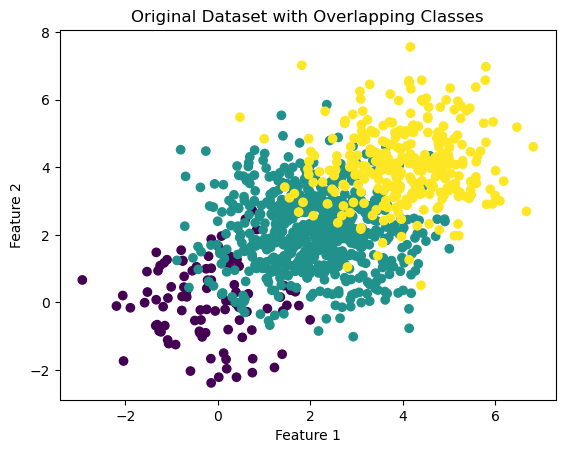

In [2]:
def getdata1():
    # Set a fixed random seed
    np.random.seed(42)
    
    # Generate data for the first class.
    class1_data = np.random.randn(100, 2)
    
    # Generate data for the second class.
    class2_data = np.random.randn(600, 2) + np.array([2, 2])
    
    # Generate data for the third class.
    class3_data = np.random.randn(300, 2) + np.array([4, 4])
    
    # Add some overlap between the classes.
    class1_data += np.random.randn(100, 2) * 0.5
    class2_data += np.random.randn(600, 2) * 0.5
    class3_data += np.random.randn(300, 2) * 0.5
    
    # Combine the data for all classes.
    X = np.vstack([class1_data, class2_data, class3_data])
    
    # Generate labels for the data.
    y = np.array([0] * 100 + [1] * 600 + [2] * 300)

    return X, y

def getdata2():
    input = 'balance'
    dataset = f'data/{input}.csv'
    df = pd.read_csv(dataset)
    label_encoder = preprocessing.LabelEncoder()
    df['class'] = label_encoder.fit_transform(df['class'])
    X = df.drop(columns=['class'])
    X = Comparer.encode_categorical(X, label_encoder)
    y = df['class']
    return X, y

X, y = getdata1()
X = pd.DataFrame(X)
X.ffill(inplace=True)
X.bfill(inplace=True)
y = pd.Series(y)
y.ffill(inplace=True)
y.bfill(inplace=True)

# Visualize the data
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y.ravel(), cmap='viridis')
plt.title('Original Dataset with Overlapping Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.2, random_state=42)

# Train an SVC on the original data
svc_original = SVC(kernel='linear')
svc_original.fit(X_train, y_train)

# Predict on the test set using the original model
y_pred_original = svc_original.predict(X_test)

# Calculate gmean of the original SVC
gmean_original = geometric_mean_score(y_test, y_pred_original)
print(f"G-mean of SVC on original data: {gmean_original:.4f}")

G-mean of SVC on original data: 0.8379


In [4]:
start_time = time.time()

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X.copy(), y.copy())

elapsed_time = (time.time() - start_time)
elapsed_time_minutes = elapsed_time
print(f'Elapsed time: {elapsed_time_minutes:.2f} second')

Elapsed time: 0.02 second


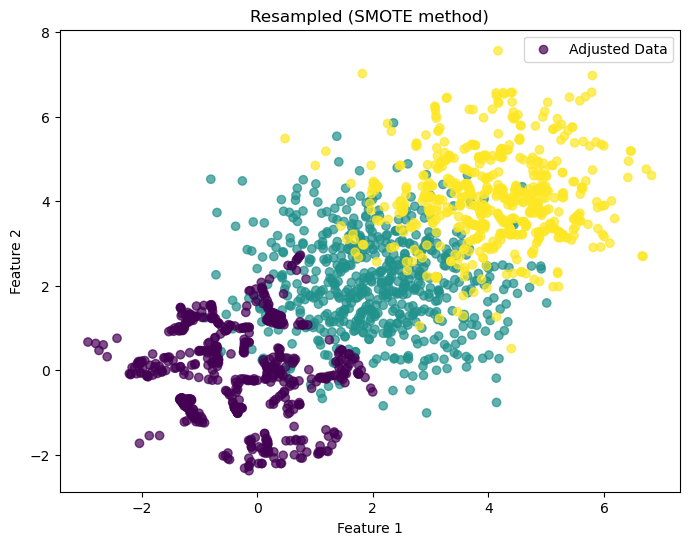

In [5]:
# Visualize the dataset with adjusted overlapping points
plt.figure(figsize=(8, 6))
plt.scatter(X_smote.iloc[:, 0], X_smote.iloc[:, 1], c=y_smote, cmap='viridis', alpha=0.7, label='Adjusted Data')
plt.title('Resampled (SMOTE method)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote.copy(), y_smote.copy(), test_size=0.2, random_state=42)

# Train an SVC on the resampled data
svc_smote = SVC(kernel='linear')
svc_smote.fit(X_train, y_train)

# Predict on the test set
y_pred_smote = svc_smote.predict(X_test)

# Calculate g-mean
gmean_smote = geometric_mean_score(y_test, y_pred_smote)
print(f"G-mean of SVC on SMOTE resampled-data: {gmean_smote:.4f}")

G-mean of SVC on SMOTE resampled-data: 0.9087


In [7]:
start_time = time.time()

ndeso = NDESO(random_state=42)
X_ndeso, y_ndeso = ndeso.fit_resample(X.copy(), y.copy())

elapsed_time = (time.time() - start_time)
elapsed_time_minutes = elapsed_time
print(f'Elapsed time: {elapsed_time_minutes:.2f} second')

Elapsed time: 0.12 second


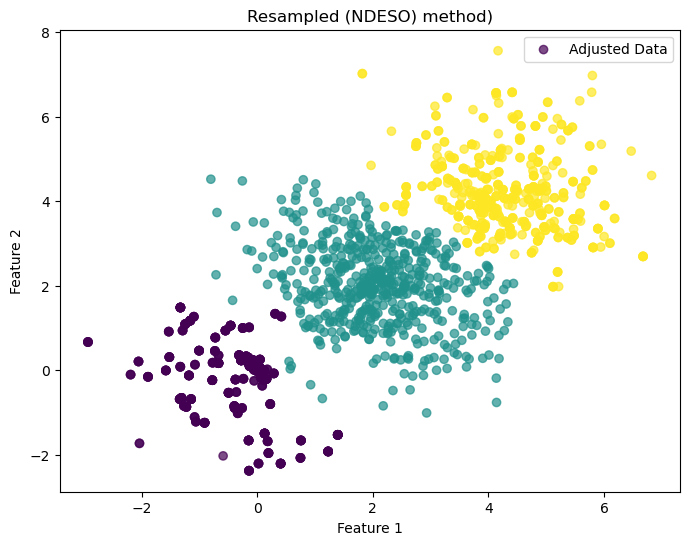

In [8]:
# Visualize the dataset with adjusted overlapping points
plt.figure(figsize=(8, 6))
plt.scatter(X_ndeso.iloc[:, 0], X_ndeso.iloc[:, 1], c=y_ndeso, cmap='viridis', alpha=0.7, label='Adjusted Data')
plt.title('Resampled (NDESO) method)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ndeso.copy(), y_ndeso.copy(), test_size=0.2, random_state=42)

# Train an SVC on the resampled data
svc_ndeso = SVC(kernel='linear')
svc_ndeso.fit(X_train, y_train)

# Predict on the test set
y_pred_ndeso = svc_ndeso.predict(X_test)

# Calculate g-mean
gmean_ndeso = geometric_mean_score(y_test, y_pred_ndeso)
print(f"G-mean of SVC on NDESO resampled-data: {gmean_ndeso:.4f}")

G-mean of SVC on NDESO resampled-data: 0.9917


In [10]:
start_time = time.time()

scdnn = SMOTECDNN(random_state=42)
X_scdnn, y_scdnn = scdnn.fit_resample(X.copy(), y.copy())

elapsed_time = (time.time() - start_time)
elapsed_time_minutes = elapsed_time
print(f'Elapsed time: {elapsed_time_minutes:.2f} second')

Elapsed time: 0.29 second


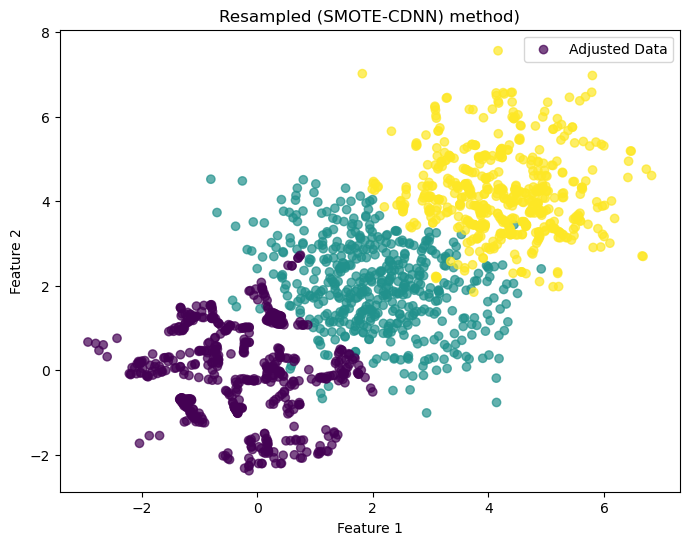

In [11]:
# Visualize the dataset with adjusted overlapping points
plt.figure(figsize=(8, 6))
plt.scatter(X_scdnn.iloc[:, 0], X_scdnn.iloc[:, 1], c=y_scdnn, cmap='viridis', alpha=0.7, label='Adjusted Data')
plt.title('Resampled (SMOTE-CDNN) method)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scdnn.copy(), y_scdnn.copy(), test_size=0.2, random_state=42)

# Train an SVC on the resampled data
svc_scdnn = SVC(kernel='linear')
svc_scdnn.fit(X_train, y_train)

# Predict on the test set
y_pred_scdnn = svc_scdnn.predict(X_test)

# Calculate g-mean
gmean_scdnn = geometric_mean_score(y_test, y_pred_scdnn)
print(f"G-mean of SVC on SMOTE-CDNN resampled-data: {gmean_scdnn:.4f}")

G-mean of SVC on SMOTE-CDNN resampled-data: 0.9692
